In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_tariff = pd.read_csv("../data/raw/electricity_utility_rates.csv")

In [4]:
df_tariff

,zip,eiaid,utility_name,state,service_type,ownership,comm_rate,ind_rate,res_rate
0,35218,195,Alabama Power Co,AL,Bundled,Investor Owned,0.105761,0.060292,0.114943
1,35219,195,Alabama Power Co,AL,Bundled,Investor Owned,0.105761,0.060292,0.114943
2,35214,195,Alabama Power Co,AL,Bundled,Investor Owned,0.105761,0.060292,0.114943
3,35215,195,Alabama Power Co,AL,Bundled,Investor Owned,0.105761,0.060292,0.114943
4,35216,195,Alabama Power Co,AL,Bundled,Investor Owned,0.105761,0.060292,0.114943
...,...,...,...,...,...,...,...,...,...
37786,77632,55937,Entergy Texas Inc.,TX,Bundled,Investor Owned,0.076957,0.056338,0.096687
37787,77316,55937,Entergy Texas Inc.,TX,Bundled,Investor Owned,0.076957,0.056338,0.096687
37788,77872,55937,Entergy Texas Inc.,TX,Bundled,Investor Owned,0.076957,0.056338,0.096687
37789,77873,55937,Entergy Texas Inc.,TX,Bundled,Investor Owned,0.076957,0.056338,0.096687


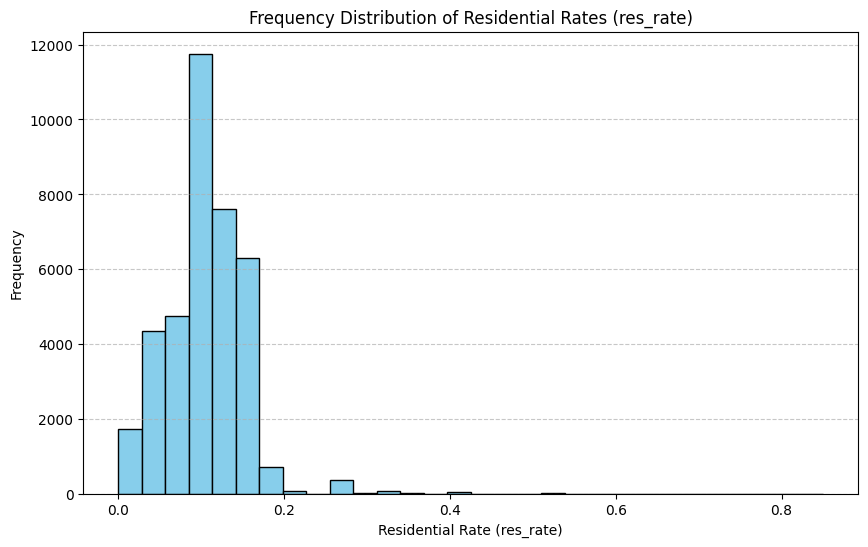

In [5]:
plt.figure(figsize=(10, 6))
plt.hist(df_tariff['res_rate'], bins=30, color='skyblue', edgecolor='black')
plt.title('Frequency Distribution of Residential Rates (res_rate)')
plt.xlabel('Residential Rate (res_rate)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [6]:
#'Duke Energy Ohio Inc' 'Connecticut Light & Power Co' 'Entergy Texas Inc.' 'Florida Power & Light Co' 'Interstate Power and Light Co'

df_filter = df_tariff[df_tariff['utility_name'].isin(['Duke Energy Ohio Inc','Connecticut Light & Power Co','Entergy Texas Inc.','Florida Power & Light Co','Interstate Power and Light Co'])]

In [7]:
def gaussian(rate):
    noise = np.random.normal(0,0.001)
    return round(rate+noise, 5)

In [8]:
df_filter['res_rate'] = df_filter['res_rate'].apply(gaussian)

C:\Users\ABHINAV\AppData\Local\Temp\ipykernel_18548\3920914386.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter['res_rate'] = df_filter['res_rate'].apply(gaussian)


In [9]:
def add_gaussian_noise_to_df(df, num_rows):
    # Calculate how many additional rows are needed
    additional_rows = num_rows - len(df)
    
    # Create additional data with Gaussian noise added
    additional_df = df.sample(additional_rows, replace=True).copy()
    additional_df['res_rate'] = additional_df['res_rate'].apply(lambda x: round(x + np.random.normal(0, 0.002), 5))
    
    # Concatenate original and additional data
    expanded_df = pd.concat([df, additional_df], ignore_index=True)
    
    return expanded_df

expanded_df = add_gaussian_noise_to_df(df_filter, 8760)

In [10]:
expanded_df

,zip,eiaid,utility_name,state,service_type,ownership,comm_rate,ind_rate,res_rate
0,45051,3542,Duke Energy Ohio Inc,OH,Bundled,Investor Owned,0.128010,0.119494,0.12347
1,45234,3542,Duke Energy Ohio Inc,OH,Bundled,Investor Owned,0.128010,0.119494,0.12165
2,45231,3542,Duke Energy Ohio Inc,OH,Bundled,Investor Owned,0.128010,0.119494,0.12189
3,45050,3542,Duke Energy Ohio Inc,OH,Bundled,Investor Owned,0.128010,0.119494,0.12202
4,45053,3542,Duke Energy Ohio Inc,OH,Bundled,Investor Owned,0.128010,0.119494,0.12218
...,...,...,...,...,...,...,...,...,...
8755,6089,4176,Connecticut Light & Power Co,CT,Bundled,Investor Owned,0.155306,0.124954,0.17680
8756,6438,4176,Connecticut Light & Power Co,CT,Bundled,Investor Owned,0.155306,0.124954,0.17260
8757,33069,6452,Florida Power & Light Co,FL,Bundled,Investor Owned,0.091609,0.073937,0.10448
8758,6156,4176,Connecticut Light & Power Co,CT,Bundled,Investor Owned,0.155306,0.124954,0.17208


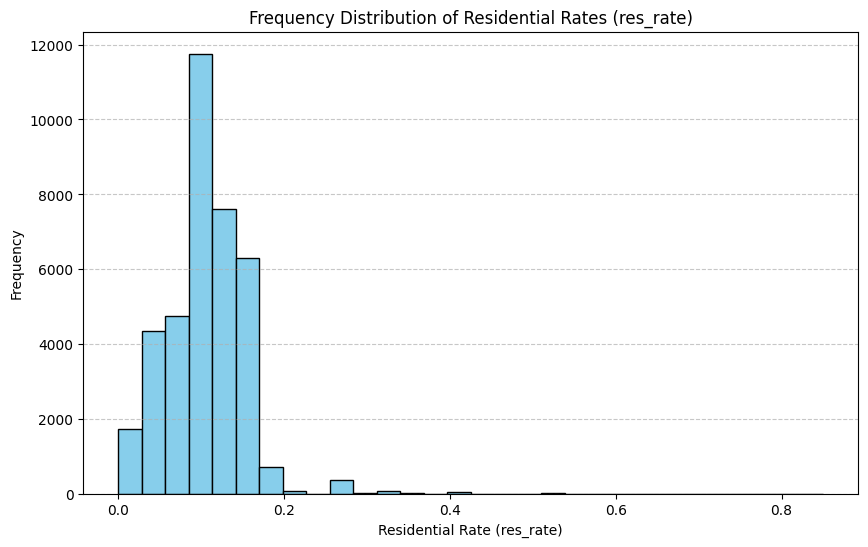

In [11]:
plt.figure(figsize=(10, 6))
plt.hist(df_tariff['res_rate'], bins=30, color='skyblue', edgecolor='black')
plt.title('Frequency Distribution of Residential Rates (res_rate)')
plt.xlabel('Residential Rate (res_rate)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [16]:
df_power = pd.read_csv("../data/processed/power.csv")
df_solar = pd.read_csv("../data/processed/solar.csv")

In [17]:
df_solar

,Unnamed: 0,datetime,WindSpeed,Sunshine,AirPressure,Radiation,AirTemperature,RelativeAirHumidity,SystemProduction,Unnamed: 9
0,0,01/01/2017 00:00,0.6,0,1003.8,-7.4,0.1,97,0.0,NaN
1,1,01/01/2017 01:00,1.7,0,1003.5,-7.4,-0.2,98,0.0,NaN
2,2,01/01/2017 02:00,0.6,0,1003.4,-6.7,-1.2,99,0.0,NaN
3,3,01/01/2017 03:00,2.4,0,1003.3,-7.2,-1.3,99,0.0,NaN
4,4,01/01/2017 04:00,4.0,0,1003.1,-6.3,3.6,67,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...
8755,8755,31/12/2017 19:00,4.1,0,988.2,-4.8,-0.7,94,0.0,NaN
8756,8756,31/12/2017 20:00,2.1,0,987.3,-5.0,-0.3,95,0.0,NaN
8757,8757,31/12/2017 21:00,1.8,0,986.7,-5.3,0.2,93,0.0,NaN
8758,8758,31/12/2017 22:00,2.2,0,986.0,-5.4,0.3,92,0.0,NaN


In [18]:
df_power['solar'] = 0

In [19]:
df_power

,Unnamed: 0.1,Unnamed: 0,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,solar_y,solar
0,0,0,01/01/2017 00:00,0.484,0.062,247.86,2.2,0,0,0.0,0.0,0
1,1,1,01/01/2017 01:00,0.586,0.078,246.22,2.6,0,0,0.0,0.0,0
2,2,2,01/01/2017 02:00,0.652,0.18,244.88,2.8,0,0,0.0,0.0,0
3,3,3,01/01/2017 03:00,0.576,0.078,245.87,2.6,0,0,0.0,0.0,0
4,4,4,01/01/2017 04:00,0.478,0.062,244.7,2.2,0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8755,8755,8755,31/12/2017 19:00,3.158,0.21,237.29,13.2,0,1,18.0,0.0,0
8756,8756,8756,31/12/2017 20:00,2.434,0.068,237.39,10.2,0,0,18.0,0.0,0
8757,8757,8757,31/12/2017 21:00,3.116,0.218,238.05,13,0,0,18.0,0.0,0
8758,8758,8758,31/12/2017 22:00,2.494,0.196,235.45,10.6,0,1,18.0,0.0,0


In [20]:
df_powercopy = df_power.copy()

In [21]:
df_powercopy = df_powercopy.merge(df_solar, on='datetime', how='left')

In [22]:
random_indices = np.random.choice(df_powercopy.index, size=int(0.2 * len(df_powercopy)), replace=False)

In [23]:
random_indices

array([4226, 8141, 7102, ..., 2601, 5815, 6532])

In [24]:
df_powercopy.loc[random_indices, 'solar'] = df_powercopy.loc[random_indices, 'SystemProduction']

C:\Users\ABHINAV\AppData\Local\Temp\ipykernel_18548\1323282678.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[  0.       0.       0.     ... 202.8333   0.       0.    ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_powercopy.loc[random_indices, 'solar'] = df_powercopy.loc[random_indices, 'SystemProduction']


In [25]:
df_powercopy

,Unnamed: 0.1,Unnamed: 0_x,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,...,solar,Unnamed: 0_y,WindSpeed,Sunshine,AirPressure,Radiation,AirTemperature,RelativeAirHumidity,SystemProduction,Unnamed: 9
0,0,0,01/01/2017 00:00,0.484,0.062,247.86,2.2,0,0,0.0,...,0.0,0,0.6,0,1003.8,-7.4,0.1,97,0.0,NaN
1,1,1,01/01/2017 01:00,0.586,0.078,246.22,2.6,0,0,0.0,...,0.0,1,1.7,0,1003.5,-7.4,-0.2,98,0.0,NaN
2,2,2,01/01/2017 02:00,0.652,0.18,244.88,2.8,0,0,0.0,...,0.0,2,0.6,0,1003.4,-6.7,-1.2,99,0.0,NaN
3,3,3,01/01/2017 03:00,0.576,0.078,245.87,2.6,0,0,0.0,...,0.0,3,2.4,0,1003.3,-7.2,-1.3,99,0.0,NaN
4,4,4,01/01/2017 04:00,0.478,0.062,244.7,2.2,0,0,0.0,...,0.0,4,4.0,0,1003.1,-6.3,3.6,67,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,8755,8755,31/12/2017 19:00,3.158,0.21,237.29,13.2,0,1,18.0,...,0.0,8755,4.1,0,988.2,-4.8,-0.7,94,0.0,NaN
8756,8756,8756,31/12/2017 20:00,2.434,0.068,237.39,10.2,0,0,18.0,...,0.0,8756,2.1,0,987.3,-5.0,-0.3,95,0.0,NaN
8757,8757,8757,31/12/2017 21:00,3.116,0.218,238.05,13,0,0,18.0,...,0.0,8757,1.8,0,986.7,-5.3,0.2,93,0.0,NaN
8758,8758,8758,31/12/2017 22:00,2.494,0.196,235.45,10.6,0,1,18.0,...,0.0,8758,2.2,0,986.0,-5.4,0.3,92,0.0,NaN


In [26]:
df_power = df_power.merge(df_powercopy[['datetime','solar']], on='datetime', how='left')

In [27]:
df_power

,Unnamed: 0.1,Unnamed: 0,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,solar_y,solar_x,solar_y
0,0,0,01/01/2017 00:00,0.484,0.062,247.86,2.2,0,0,0.0,0.0,0,0.0
1,1,1,01/01/2017 01:00,0.586,0.078,246.22,2.6,0,0,0.0,0.0,0,0.0
2,2,2,01/01/2017 02:00,0.652,0.18,244.88,2.8,0,0,0.0,0.0,0,0.0
3,3,3,01/01/2017 03:00,0.576,0.078,245.87,2.6,0,0,0.0,0.0,0,0.0
4,4,4,01/01/2017 04:00,0.478,0.062,244.7,2.2,0,0,0.0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,8755,8755,31/12/2017 19:00,3.158,0.21,237.29,13.2,0,1,18.0,0.0,0,0.0
8756,8756,8756,31/12/2017 20:00,2.434,0.068,237.39,10.2,0,0,18.0,0.0,0,0.0
8757,8757,8757,31/12/2017 21:00,3.116,0.218,238.05,13,0,0,18.0,0.0,0,0.0
8758,8758,8758,31/12/2017 22:00,2.494,0.196,235.45,10.6,0,1,18.0,0.0,0,0.0


In [28]:
df_power = df_power.drop(columns=['solar_x'], axis=1)

In [30]:
df_power.to_csv("../data/processed/power.csv")